## 필수과제 1.3
### 시간대에 따른 시각화와 인사이트 정리
* 시간대를 적절하게 나누는 것도 중요
    * 일반적으로 이는 domain knowledge 를 활용하는게 우선이지만 예제 data이므로 편의상 hourly 로 구분
* 각 월 단위로 요일별 전환율 차이를 살펴볼때
    * view -> cart : 저녁 시간대로 갈수록 증가하는 추세를 보임. 10월에는 11월,12월 대비 차이가 큰것을 볼 수 있는데 저녁 시간대에 유입을 유도하는 이벤트 효과를 유추할 수 있음
    * cart -> purchase : 오전 10~12시 시간대에 가장 크게 증가하고 그 이후에 감소하다가 저녁 20시 정도에 다시 증가하다가 감소하는 추이를 보임
    * view -> purcahse : cart -> purchase 와 비슷하게 오전 10~12시 시간대까지 증가하고 그 이후 감소하다가 저녁 시간대 (17~ 20시)에 가장 크게 증가하는 추세를 보임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
df1 = pd.read_csv("../dataset/2019-Oct.csv")
df2 = pd.read_csv("../dataset/2019-Nov.csv")
df3 = pd.read_csv("../dataset/2019-Dec.csv")

In [5]:
def prc_datetime(df):
    df['event_time'] = pd.to_datetime(df['event_time'])
    df['event_date'] = df['event_time'].dt.date
    df['event_hour'] = df['event_time'].dt.hour
    return df

In [6]:
df1 = prc_datetime(df1)
df2 = prc_datetime(df2)
df3 = prc_datetime(df3)

In [7]:
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,0
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,0


In [8]:
df1.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
4102278,2019-10-31 23:59:25+00:00,remove_from_cart,5848062,1526733091857498510,NaN,NaN,9.21,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a,2019-10-31,23
4102279,2019-10-31 23:59:30+00:00,view,5885631,1783999064103190764,NaN,NaN,15.48,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-10-31,23
4102280,2019-10-31 23:59:34+00:00,view,5784898,1487580009143992338,NaN,NaN,1.78,564441099,8cbf1746-2d46-4169-afb1-b5fa38ee1ba4,2019-10-31,23
4102281,2019-10-31 23:59:36+00:00,view,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a,2019-10-31,23
4102282,2019-10-31 23:59:54+00:00,view,59996,1487580012927254698,NaN,NaN,4.13,566280798,4eaf7c71-e8bf-4ea6-b719-eca144466eb3,2019-10-31,23


In [9]:
bins = [0, 6, 10, 13, 16, 20, 23]  # 경계값
labels = ['새벽', '오전', '점심시간', '오후', '저녁시간', '야간']
df1['time_group'] = pd.cut(df1['event_hour'],  bins=bins, labels=labels, right=True, include_lowest=True)
df1.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,time_group
4102278,2019-10-31 23:59:25+00:00,remove_from_cart,5848062,1526733091857498510,NaN,NaN,9.21,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a,2019-10-31,23,야간
4102279,2019-10-31 23:59:30+00:00,view,5885631,1783999064103190764,NaN,NaN,15.48,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-10-31,23,야간
4102280,2019-10-31 23:59:34+00:00,view,5784898,1487580009143992338,NaN,NaN,1.78,564441099,8cbf1746-2d46-4169-afb1-b5fa38ee1ba4,2019-10-31,23,야간
4102281,2019-10-31 23:59:36+00:00,view,5870838,1487580007675986893,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a,2019-10-31,23,야간
4102282,2019-10-31 23:59:54+00:00,view,59996,1487580012927254698,NaN,NaN,4.13,566280798,4eaf7c71-e8bf-4ea6-b719-eca144466eb3,2019-10-31,23,야간


In [12]:
df1.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,time_group
3049559,2019-10-23 14:08:41+00:00,view,5766769,1487580007659209676,NaN,irisk,2.89,480718358,ca47e497-a762-4c65-bf66-19318ebd02b1,2019-10-23,14,오후
782025,2019-10-06 14:58:55+00:00,cart,5730970,1487580004916134735,NaN,NaN,6.35,557400375,a55c7e2a-af1d-4439-9060-a8d62162f55f,2019-10-06,14,오후
2066588,2019-10-15 19:06:26+00:00,cart,5846817,1487580013489291461,NaN,browxenna,8.57,560582050,c525a493-21c7-4ec1-9caa-fc9207746e57,2019-10-15,19,저녁시간
749789,2019-10-06 11:43:00+00:00,view,5550110,1487580005595612013,NaN,NaN,3.00,471299022,c9aaa2c7-f7b7-4b7d-9e35-152b5d86514d,2019-10-06,11,점심시간
2894882,2019-10-22 11:19:30+00:00,purchase,6730,1487580007256556476,NaN,NaN,7.92,349840792,1345d1ab-4163-46ce-a85d-e195e0b2793f,2019-10-22,11,점심시간
2381885,2019-10-18 07:28:59+00:00,view,5823777,1487580013749338323,NaN,estel,2.38,470098263,04323f4f-f14d-415d-a587-31777e79a33d,2019-10-18,7,오전
3678287,2019-10-28 16:55:00+00:00,view,5849033,1487580005092295511,NaN,uno,10.32,558534574,3ab3a040-c2f3-438f-b6c6-11fcf44240ed,2019-10-28,16,오후
2270785,2019-10-17 09:47:57+00:00,cart,5854835,1602943681873052386,NaN,grattol,5.24,559541662,3b05e9b8-5fb7-4d87-8a28-ad4c84583975,2019-10-17,9,오전
309399,2019-10-02 19:10:01+00:00,cart,5870378,1487580007675986893,NaN,NaN,1.75,554825744,7549c250-25fa-4387-92b8-bd54132f6236,2019-10-02,19,저녁시간
2866305,2019-10-22 08:01:42+00:00,view,5835303,1487580013581566154,NaN,oniq,11.90,551355332,7f556cc9-95a0-4f74-84c3-34ae9aa44cd2,2019-10-22,8,오전


In [13]:
df2['time_group'] = pd.cut(df2['event_hour'],  bins=bins, labels=labels, right=True, include_lowest=True)
df3['time_group'] = pd.cut(df3['event_hour'],  bins=bins, labels=labels, right=True, include_lowest=True)

In [19]:
def get_hour_event_agg_info(df):
    hour_funnel_cohort = df.groupby(['event_hour','event_type'])['user_id'].nunique().unstack(fill_value=0)
    hour_funnel_cohort['view_to_cart_ratio'] = (hour_funnel_cohort['cart'] / hour_funnel_cohort['view']*100).round(2)
    hour_funnel_cohort['cart_to_purchase_ratio'] = (hour_funnel_cohort['purchase'] / hour_funnel_cohort['cart']*100).round(2)
    hour_funnel_cohort['view_to_purchase_ratio'] = (hour_funnel_cohort['purchase'] / hour_funnel_cohort['view']*100).round(2)
    return hour_funnel_cohort

oct_hour_funnel_cohort = get_hour_event_agg_info(df1)
nov_hour_funnel_cohort = get_hour_event_agg_info(df2)
dec_hour_funnel_cohort = get_hour_event_agg_info(df3)

def get_time_event_agg_info(df):
    time_funnel_cohort = df.groupby(['time_group','event_type'])['user_id'].nunique().unstack(fill_value=0)
    time_funnel_cohort['view_to_cart_ratio'] = (time_funnel_cohort['cart'] / time_funnel_cohort['view']*100).round(2)
    time_funnel_cohort['cart_to_purchase_ratio'] = (time_funnel_cohort['purchase'] / time_funnel_cohort['cart']*100).round(2)
    time_funnel_cohort['view_to_purchase_ratio'] = (time_funnel_cohort['purchase'] / time_funnel_cohort['view']*100).round(2)
    return time_funnel_cohort

oct_time_funnel_cohort = get_time_event_agg_info(df1)
nov_time_funnel_cohort = get_time_event_agg_info(df2)
dec_time_funnel_cohort = get_time_event_agg_info(df3)

<Axes: xlabel='event_hour', ylabel='view_to_cart_ratio'>

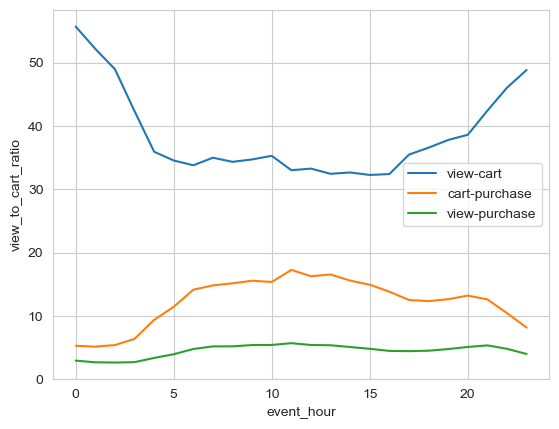

In [23]:
sns.lineplot(data = oct_hour_funnel_cohort, x=oct_hour_funnel_cohort.index, y='view_to_cart_ratio',label='view-cart')
sns.lineplot(data = oct_hour_funnel_cohort, x=oct_hour_funnel_cohort.index, y='cart_to_purchase_ratio',label='cart-purchase')
sns.lineplot(data = oct_hour_funnel_cohort, x=oct_hour_funnel_cohort.index, y='view_to_purchase_ratio',label='view-purchase')

<Axes: xlabel='event_hour', ylabel='view_to_cart_ratio'>

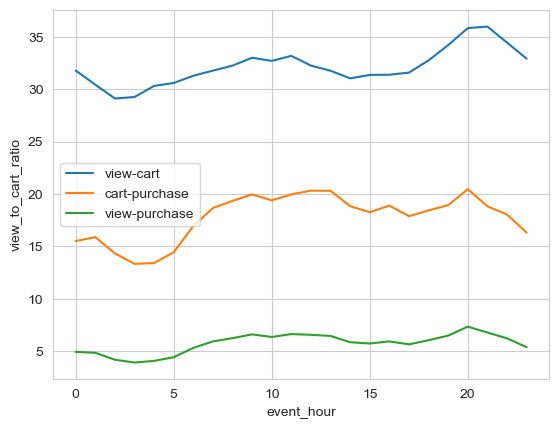

In [24]:

sns.lineplot(data = nov_hour_funnel_cohort, x=nov_hour_funnel_cohort.index, y='view_to_cart_ratio',label='view-cart')
sns.lineplot(data = nov_hour_funnel_cohort, x=nov_hour_funnel_cohort.index, y='cart_to_purchase_ratio',label='cart-purchase')
sns.lineplot(data = nov_hour_funnel_cohort, x=nov_hour_funnel_cohort.index, y='view_to_purchase_ratio',label='view-purchase')

<Axes: xlabel='event_hour', ylabel='view_to_cart_ratio'>

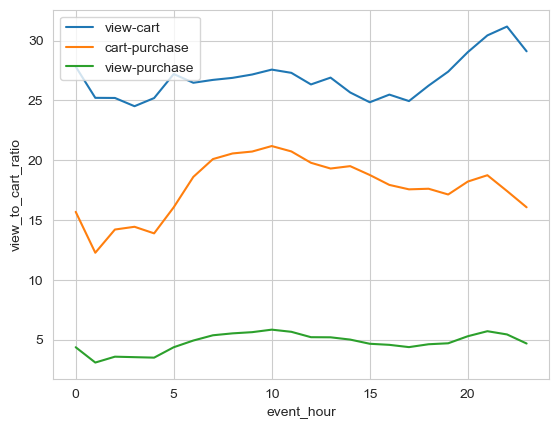

In [25]:
sns.lineplot(data = dec_hour_funnel_cohort, x=dec_hour_funnel_cohort.index, y='view_to_cart_ratio',label='view-cart')
sns.lineplot(data = dec_hour_funnel_cohort, x=dec_hour_funnel_cohort.index, y='cart_to_purchase_ratio',label='cart-purchase')
sns.lineplot(data = dec_hour_funnel_cohort, x=dec_hour_funnel_cohort.index, y='view_to_purchase_ratio',label='view-purchase')

<Axes: xlabel='event_hour', ylabel='view_to_cart_ratio'>

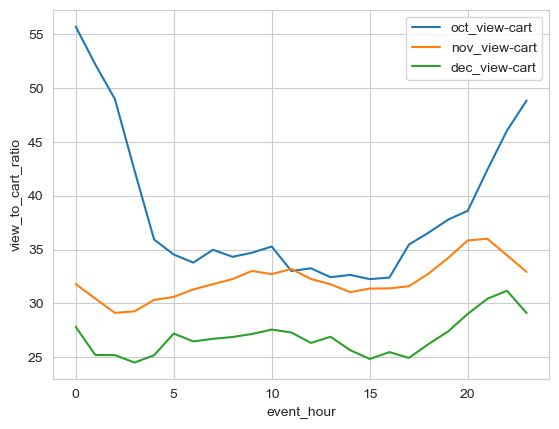

In [26]:
sns.lineplot(data = oct_hour_funnel_cohort, x=oct_hour_funnel_cohort.index, y='view_to_cart_ratio',label='oct_view-cart')
sns.lineplot(data = nov_hour_funnel_cohort, x=nov_hour_funnel_cohort.index, y='view_to_cart_ratio',label='nov_view-cart')
sns.lineplot(data = dec_hour_funnel_cohort, x=dec_hour_funnel_cohort.index, y='view_to_cart_ratio',label='dec_view-cart')

<Axes: xlabel='event_hour', ylabel='cart_to_purchase_ratio'>

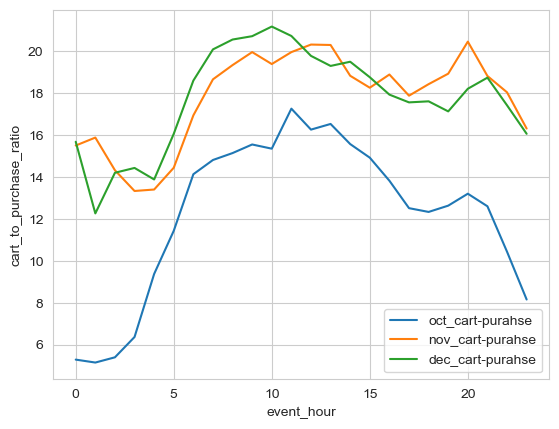

In [30]:
sns.lineplot(data = oct_hour_funnel_cohort, x=oct_hour_funnel_cohort.index, y='cart_to_purchase_ratio',label='oct_cart-purahse')
sns.lineplot(data = nov_hour_funnel_cohort, x=nov_hour_funnel_cohort.index, y='cart_to_purchase_ratio',label='nov_cart-purahse')
sns.lineplot(data = dec_hour_funnel_cohort, x=dec_hour_funnel_cohort.index, y='cart_to_purchase_ratio',label='dec_cart-purahse')

<Axes: xlabel='event_hour', ylabel='view_to_purchase_ratio'>

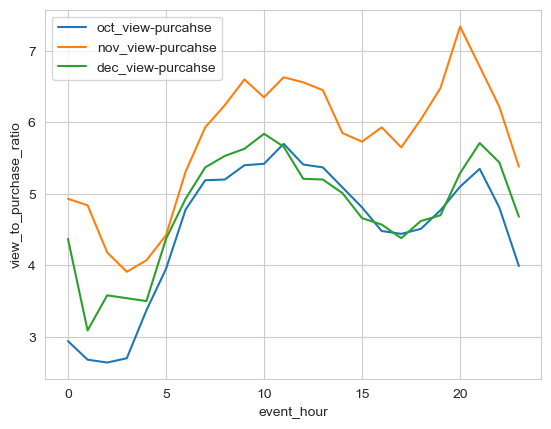

In [31]:
sns.lineplot(data = oct_hour_funnel_cohort, x=oct_hour_funnel_cohort.index, y='view_to_purchase_ratio',label='oct_view-purcahse')
sns.lineplot(data = nov_hour_funnel_cohort, x=nov_hour_funnel_cohort.index, y='view_to_purchase_ratio',label='nov_view-purcahse')
sns.lineplot(data = dec_hour_funnel_cohort, x=dec_hour_funnel_cohort.index, y='view_to_purchase_ratio',label='dec_view-purcahse')